In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
print(print(tf.__version__))

Instructions for updating:
non-resource variables are not supported in the long term
2.14.0
None


#MNIST: loading, splitting, and reshaping

In [2]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
import numpy as np

# Assuming `y_train` and `y_test` are your training and testing labels respectively
# Convert labels: 5 becomes 1, and all other digits become 0

y_train_binary = np.where(training_labels == 5, 1, 0)
y_test_binary = np.where(test_labels == 5, 1, 0)

# Now `y_train_binary` and `y_test_binary` contain labels where 5 is class 0, and all other digits are class 1


#Convnet architecture definition

*   One convolution layer (32 filters of shape (3,3) with ReLU)
*   One max-pooling layer (filter shape: (2,2))
*   One fully connected layer (128 units; ReLU activation)
*   10 output units (softmax layer)



In [27]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

#Model training

In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(training_images, y_train_binary, epochs=10)

Train on 60000 samples
Epoch 1/10
  832/60000 [..............................] - ETA: 9s - loss: 0.3173 - acc: 0.8858 

2024-02-27 20:52:34.196536: W tensorflow/c/c_api.cc:305] Operation '{name:'training_8/Adam/beta_1/Assign' id:1625 op device:{requested: '', assigned: ''} def:{{{node training_8/Adam/beta_1/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_8/Adam/beta_1, training_8/Adam/beta_1/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


60000/60000 [==============================] - 8s 128us/sample - loss: 0.0659 - acc: 0.9862
Epoch 2/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0234 - acc: 0.9963
Epoch 3/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0077 - acc: 0.9976
Epoch 4/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0048 - acc: 0.9984
Epoch 5/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0025 - acc: 0.9992
Epoch 6/10
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0019 - acc: 0.9994
Epoch 7/10
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0014 - acc: 0.9996
Epoch 8/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0011 - acc: 0.9996
Epoch 9/10
60000/60000 [==============================] - 8s 132us/sample - loss: 3.5914e-04 - acc: 0.9999
Epoch 10/10
60000/60000 [==============================] - 8s 132us/sample - los

#Evaluation with test data

In [29]:
test_loss, test_acc = model.evaluate(test_images, y_test_binary)
print(test_acc)

2024-02-27 20:53:52.761203: W tensorflow/c/c_api.cc:305] Operation '{name:'loss_4/mul' id:1503 op device:{requested: '', assigned: ''} def:{{{node loss_4/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_4/mul/x, loss_4/dense_11_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


0.9971


## Q2

In [30]:
predictions = model.predict(test_images)
predicted_classes = (predictions > 0.5).astype(int)


2024-02-27 20:53:53.100133: W tensorflow/c/c_api.cc:305] Operation '{name:'dense_11/Sigmoid' id:1446 op device:{requested: '', assigned: ''} def:{{{node dense_11/Sigmoid}} = Sigmoid[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_11/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


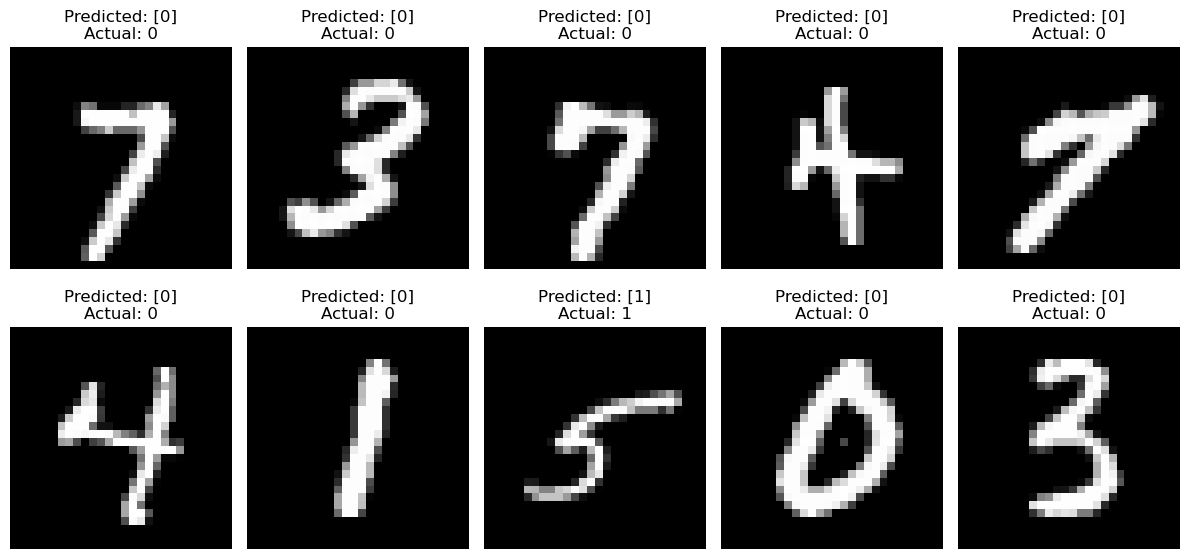

In [31]:
import matplotlib.pyplot as plt

indices = np.random.choice(range(len(test_images)), 10, replace=False)

# Plotting
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.flatten()

for i, idx in enumerate(indices):
    axes[i].imshow(test_images[idx], cmap='gray')
    axes[i].set_title(f"Predicted: {predicted_classes[idx]}\nActual: {y_test_binary[idx]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## Q3

In [47]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = tf.keras.models.Sequential([
  Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  BatchNormalization(), # Normalize the activations of the previous layer at each batch
  MaxPooling2D(2, 2),
  Conv2D(64, (3,3), activation='relu'), # Adding an additional Conv2D layer to capture more complex features
  BatchNormalization(), # Normalize the activations of the previous layer at each batch
  MaxPooling2D(2,2),
  Flatten(),
  Dense(128, activation='relu'),
  Dropout(0.5), # Dropout for regularization to reduce overfitting
  Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(training_images, y_train_binary, epochs=6, validation_split=0.2) # Added validation split for monitoring overfitting

Train on 48000 samples, validate on 12000 samples
Epoch 1/6
  256/48000 [..............................] - ETA: 22s - loss: 0.8610 - acc: 0.8398 

2024-02-27 21:18:38.485507: W tensorflow/c/c_api.cc:305] Operation '{name:'training_20/Adam/beta_2/Assign' id:6496 op device:{requested: '', assigned: ''} def:{{{node training_20/Adam/beta_2/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_20/Adam/beta_2, training_20/Adam/beta_2/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


48000/48000 [==============================] - ETA: 0s - loss: 0.0359 - acc: 0.9896

2024-02-27 21:18:49.713378: W tensorflow/c/c_api.cc:305] Operation '{name:'loss_10/mul' id:6224 op device:{requested: '', assigned: ''} def:{{{node loss_10/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_10/mul/x, loss_10/dense_24_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


48000/48000 [==============================] - 12s 248us/sample - loss: 0.0359 - acc: 0.9896 - val_loss: 0.0144 - val_acc: 0.9955
Epoch 2/6
48000/48000 [==============================] - 12s 242us/sample - loss: 0.0155 - acc: 0.9953 - val_loss: 0.0128 - val_acc: 0.9965
Epoch 3/6
48000/48000 [==============================] - 12s 243us/sample - loss: 0.0127 - acc: 0.9959 - val_loss: 0.0121 - val_acc: 0.9968
Epoch 4/6
48000/48000 [==============================] - 12s 244us/sample - loss: 0.0095 - acc: 0.9973 - val_loss: 0.0386 - val_acc: 0.9940
Epoch 5/6
48000/48000 [==============================] - 12s 241us/sample - loss: 0.0088 - acc: 0.9974 - val_loss: 0.0181 - val_acc: 0.9973
Epoch 6/6
48000/48000 [==============================] - 12s 243us/sample - loss: 0.0066 - acc: 0.9978 - val_loss: 0.0215 - val_acc: 0.9971


In [49]:
test_loss, test_acc = model.evaluate(test_images, y_test_binary)
print(test_acc)

0.998


The addition of another Conv2D layer with 64 filters allows the model to learn more complex patterns in the data.

The batch normalization technique normalizes the input to each layer for each mini-batch, which stabilizes the learning process and improves the training speed, performance, and stability of deep neural networks.

Implementing Dropout during training helps prevent overfitting by setting random input units to 0 at each update, which makes the model more robust and less likely to rely on a single feature.

By using a validation split, we can monitor the model's performance on unseen data during training, thereby providing an early indication of overfitting.

By reducing the number of ephochs to 6, we can prevent overfitting since we already used a more complex architecture.

We had an improvement from 0.9971 to 0.9980

## Q4

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


predictions = model.predict(test_images)
predictions = (predictions > 0.5).astype(int) 

accuracy = accuracy_score(y_test_binary, predictions)
precision = precision_score(y_test_binary, predictions)
recall = recall_score(y_test_binary, predictions)
f1 = f1_score(y_test_binary, predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


/Users/samskanderi/anaconda3/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2024-02-27 21:14:46.088704: W tensorflow/c/c_api.cc:305] Operation '{name:'dense_20/Sigmoid' id:4532 op device:{requested: '', assigned: ''} def:{{{node dense_20/Sigmoid}} = Sigmoid[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_20/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Accuracy: 0.9977
Precision: 0.9943117178612059
Recall: 0.9798206278026906
F1 Score: 0.987012987012987
